In [1]:
import pandas as pd
import sklearn
import plotly
import scipy
import sympy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_name = ['age' , 'workclass' , 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','result']
train = pd.read_csv(url, sep=' ', header = None, names= col_name)

In [3]:
sex  = pd.get_dummies(train['sex'],drop_first=True)
train.drop(['sex'],axis=1,inplace=True)
train = pd.concat([train,sex],axis=1)
race  = pd.get_dummies(train['race'],drop_first=True)
train.drop(['race'],axis=1,inplace=True)
train = pd.concat([train,race],axis=1)
train.head()
result  = pd.get_dummies(train['result'],drop_first=True)
train.drop(['result'],axis=1,inplace=True)
train = pd.concat([train,result],axis=1)
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,"Male,","Asian-Pac-Islander,","Black,","Other,","White,",>50K
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","2174,","0,","40,","United-States,",1,0,0,0,1,0
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","0,","0,","13,","United-States,",1,0,0,0,1,0
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","0,","0,","40,","United-States,",1,0,0,0,1,0
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","0,","0,","40,","United-States,",1,0,1,0,0,0
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","0,","0,","40,","Cuba,",0,0,1,0,0,0


In [4]:
train['age']= train['age'].str.extract('(\d+)', expand=False).astype(int)
train['education-num']= train['education-num'].str.extract('(\d+)', expand=False).astype(int)
train['hours-per-week']= train['hours-per-week'].str.extract('(\d+)', expand=False).astype(int)
train['capital-gain']= train['capital-gain'].str.extract('(\d+)', expand=False).astype(int)
train['capital-loss']= train['capital-loss'].str.extract('(\d+)', expand=False).astype(int)
train['fnlwgt']= train['fnlwgt'].str.extract('(\d+)', expand=False).astype(int)

In [5]:
cat_vars=['workclass','education','marital-status','occupation','relationship','native-country']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train= train1
    train.drop([var],axis=1,inplace=True)
cat_vars=['workclass','education','marital-status','occupation','relationship','native-country']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [6]:
train_final=train[to_keep]
train_final.columns.values

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Male,', 'Asian-Pac-Islander,', 'Black,',
       'Other,', 'White,', '>50K', 'workclass_?,',
       'workclass_Federal-gov,', 'workclass_Local-gov,',
       'workclass_Never-worked,', 'workclass_Private,',
       'workclass_Self-emp-inc,', 'workclass_Self-emp-not-inc,',
       'workclass_State-gov,', 'workclass_Without-pay,',
       'education_10th,', 'education_11th,', 'education_12th,',
       'education_1st-4th,', 'education_5th-6th,', 'education_7th-8th,',
       'education_9th,', 'education_Assoc-acdm,', 'education_Assoc-voc,',
       'education_Bachelors,', 'education_Doctorate,',
       'education_HS-grad,', 'education_Masters,', 'education_Preschool,',
       'education_Prof-school,', 'education_Some-college,',
       'marital-status_Divorced,', 'marital-status_Married-AF-spouse,',
       'marital-status_Married-civ-spouse,',
       'marital-status_Married-spouse-absent,',
       '

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 107 entries, age to native-country_Yugoslavia,
dtypes: int32(6), uint8(101)
memory usage: 3.9 MB


In [8]:
# Labels are the values we want to predict
labels = np.array(train['>50K'])
# Remove the labels from the features
# axis 1 refers to the columns
train= train.drop('>50K', axis = 1)
# Saving feature names for later use
train_list = list(train.columns)
# Convert to numpy array
train = np.array(train)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(train, labels, test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (24420, 106)
Training Labels Shape: (24420,)
Testing Features Shape: (8141, 106)
Testing Labels Shape: (8141,)


In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [12]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

Mean Absolute Error: 0.1852 degrees.


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors) 
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Accuracy: 81.4799 %.


In [14]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = train_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [15]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = train_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [16]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(train, round(importance, 3)) for train, importance in zip(train_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: marital-status_Married-civ-spouse, Importance: 0.2
Variable: fnlwgt               Importance: 0.169
Variable: age                  Importance: 0.113
Variable: education-num        Importance: 0.113
Variable: capital-gain         Importance: 0.104
Variable: hours-per-week       Importance: 0.063
Variable: capital-loss         Importance: 0.037
Variable: occupation_Exec-managerial, Importance: 0.012
Variable: workclass_Private,   Importance: 0.009
Variable: workclass_Self-emp-not-inc, Importance: 0.009
Variable: occupation_Craft-repair, Importance: 0.009
Variable: occupation_Sales,    Importance: 0.009
Variable: occupation_Prof-specialty, Importance: 0.008
Variable: Male,                Importance: 0.006
Variable: workclass_Federal-gov, Importance: 0.006
Variable: workclass_Local-gov, Importance: 0.006
Variable: workclass_Self-emp-inc, Importance: 0.006
Variable: occupation_Adm-clerical, Importance: 0.006
Variable: occupation_Tech-support, Importance: 0.006
Variable: occupation

In [17]:
occupation = 0
for i in feature_importances:
    if i[0].find("occupation") != -1:
        occupation += i[1]
occupation

0.078

In [18]:
native_country = 0
for i in feature_importances:
    if i[0].find("native-country") != -1:
        native_country += i[1]
native_country

0.017000000000000008

In [19]:
marital_status = 0
for i in feature_importances:
    if i[0].find("marital-status") != -1:
        marital_status += i[1]
marital_status

0.20700000000000002

In [20]:
workclass = 0
for i in feature_importances:
    if i[0].find("workclass_") != -1:
        workclass += i[1]
workclass

0.041999999999999996

In [21]:
education = 0
for i in feature_importances:
    if i[0].find("education_") != -1:
        education += i[1]
education

0.020000000000000004

In [22]:
relationship = 0
for i in feature_importances:
    if i[0].find("relationship") != -1:
        relationship += i[1]
relationship

0.014000000000000002

In [23]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [train_list.index('marital-status_Married-civ-spouse,'), train_list.index('fnlwgt')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.28 degrees.
Accuracy: 72.48 %.


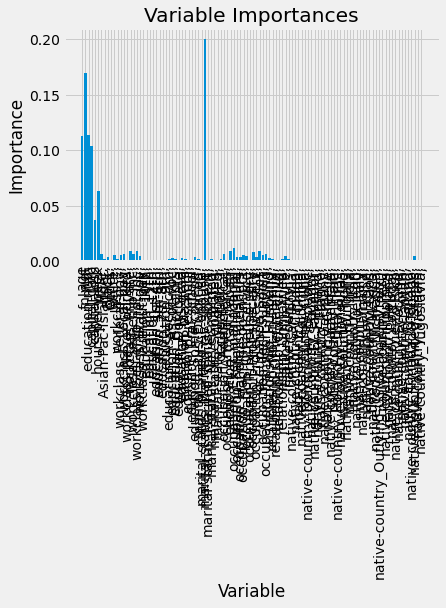

In [24]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, train_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');